In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Deriving validation targets for me

So one step I need to do is validate my MLMC implementation, particularly for the SHE. First I'll derive the expectant values for the following QoI.

• $\int_0^1 u(x,t)^2 dx$ 
• $u_n(x,t)$ - the $n$-th Fourier mode

### Deriving $\mathbb{E}\left[ \int_0^1 u(x,t)^2 dx\right]$

First, we express $u(x,t)$ in its Fourier decomposition, $u(x,t) = \sum_{n=1}^\infty X_n(t)e_n(x)$ where $e_n(x) = \sqrt{2} \sin (n\pi x)$. Before I also solved this and found that $X_n(t) = \int_0^t e^{-\lambda_n(t-s)}dB_n(s)$, which results in $X_n \sim \mathcal{N}(0, \frac{1-e^{-2\lambda_nt}}{2\lambda_n})$.

So from this, let's investigate what $\mathbb{E}\left[\int_0^1 u(x,t)^2 dx\right]$ is.

$$
\int_0^1 u^2 dx = \int_0^1 \left(\sum_{n=1}^\infty X_n(t) e_n(x)\right) \left(\sum_{n=1}^\infty X_n(t) e_n(x)\right) dx = \sum_{n=1}^{\infty} \sum_{m=1}^{\infty}X_n(t)X_m(t) \langle e_n, e_m \rangle 
= \sum_{n=1}^{\infty} X_n(t)^2 \\
\mathbb{E}\left[ \int_0^1 u(x,t)^2 dx\right] = \mathbb{E}\left[\sum_{n=1}^{\infty}X_n(t)^2\right] = \sum_{n=1}^{\infty}\mathbb{E}\left[X_n(t)^2\right] = \sum_{n=1}^{\infty} \frac{1-e^{-2\lambda_nt}}{2\lambda_n} \\
\sum_{n=1}^{\infty} \frac{1-e^{-2\lambda_nt}}{2\lambda_n} = \sum_{n=1}^{\infty} \frac{1-e^{-2 n^2 \pi^2}}{2 n^2 \pi^2} = \frac{1}{12} - \sum_{n=1}^{\infty}\frac{e^{-2 n^2 \pi^2}}{2n^2\pi^2}\\
\boxed{\mathbb{E}\left[\int_0^1 u(x,t)^2 dx \right] = \frac{1}{12} - \sum_{n=1}^{\infty}\frac{e^{-2 n^2 \pi^2}}{2n^2\pi^2}}
$$

1 0
1 0
2 1.3553167291988714e-10
1 0
2 1.3553167291988714e-10
3 1.3553167291988714e-10
1 0
2 1.3553167291988714e-10
3 1.3553167291988714e-10
4 1.3553167291988714e-10
1 0
2 1.3553167291988714e-10
3 1.3553167291988714e-10
4 1.3553167291988714e-10
5 1.3553167291988714e-10
1 0
2 1.3553167291988714e-10
3 1.3553167291988714e-10
4 1.3553167291988714e-10
5 1.3553167291988714e-10
6 1.3553167291988714e-10
1 0
2 1.3553167291988714e-10
3 1.3553167291988714e-10
4 1.3553167291988714e-10
5 1.3553167291988714e-10
6 1.3553167291988714e-10
7 1.3553167291988714e-10
1 0
2 1.3553167291988714e-10
3 1.3553167291988714e-10
4 1.3553167291988714e-10
5 1.3553167291988714e-10
6 1.3553167291988714e-10
7 1.3553167291988714e-10
8 1.3553167291988714e-10
1 0
2 1.3553167291988714e-10
3 1.3553167291988714e-10
4 1.3553167291988714e-10
5 1.3553167291988714e-10
6 1.3553167291988714e-10
7 1.3553167291988714e-10
8 1.3553167291988714e-10
9 1.3553167291988714e-10
1 0
2 1.3553167291988714e-10
3 1.3553167291988714e-10
4 1.355316

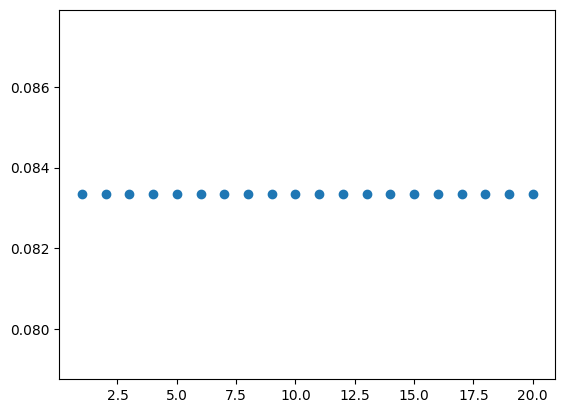

In [7]:
def energy_formula(N):
    term = 0
    for n in range(1, N+1):
        term += np.exp(- 2 * n**2 * np.pi**2) / ( 2 * n**2 * np.pi**2)
    return 1 / 12 - term

# n = 1 is sufficient for accuracy. The n = 2 term is ~10^-37 magnitude. 



[np.float64(1.3553167291988714e-10),
 np.float64(6.487724926783869e-37),
 np.float64(3.95150567695558e-80)]